In [1]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import time


In [2]:
#create the set of random longitudes and latitudes using the np method with the ranom uniform function practice in random_numbers.ipynb
lats = np.random.uniform(-90.000, 90.000, size= 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)

#pack the lats and longs together by zipping them with the zip() function
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add the latitudes and longitudes to a list (they have been stored as a zip object)
#you can only unzip a zipped tuple once before it's removed from memory
#so make sure you unzip it into a list right away

coordinates = list(lat_lngs)

In [4]:
#We need to use the citypy module to access the closest cities to given coordinate
#Went to anaconda prompt(python data) installed citpy with "pip install citipy"
#https://github.com/wingchen/citipy for inf0
from citipy import citipy


In [5]:
#create a list for holding cities

cities = []

#identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm a sufficent list
len(cities)

599

In [6]:
import requests

In [7]:

#import the API key
from config import weather_api_key


In [8]:
#Starting URL for Weather API Call from https://openweathermap.org/current#name
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
#create an endpoint URL for a city to specify
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather
#create output for request errors in case the url doesnt work and doesnt produce a status of 200
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [11]:
#get the text of the 'get'request
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"base":"stations","main":{"temp":57.94,"feels_like":56.35,"temp_min":51.01,"temp_max":64.4,"pressure":1019,"humidity":62},"visibility":10000,"wind":{"speed":17.27,"deg":110},"clouds":{"all":40},"dt":1618008752,"sys":{"type":1,"id":3486,"country":"US","sunrise":1617963151,"sunset":1618010311},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [12]:
#get the JSON text of the 'get' request, much easier to read and save to a variable
boston_data = city_weather.json()
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 57.94,
  'feels_like': 56.35,
  'temp_min': 51.01,
  'temp_max': 64.4,
  'pressure': 1019,
  'humidity': 62},
 'visibility': 10000,
 'wind': {'speed': 17.27, 'deg': 110},
 'clouds': {'all': 40},
 'dt': 1618008752,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1617963151,
  'sunset': 1618010311},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
#use the 'sys' key from the json text, we see above that the country ID is
#in this key and we can pull that by using the "country" key after
boston_data["sys"]["country"]

'US'

In [14]:
#get all interesting data and save it to variables
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 64.4 62 40 17.27


In [15]:
#pull the date timestamp from the data
boston_data["dt"]

1618008752

In [16]:
#convert that timestamp into ISO, a standardzed date format
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 4, 9, 22, 52, 32)

In [17]:
#convert the previously acquired ISO date into a readable format using
#the method strftime() that lets you add how you want the string to look
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-04-09 22:52:32'

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters that start at 1 not 0.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
#create a loop through our generated city list to build a url for each city

#for i in range(len(cities)):

#use enumerate() to retrieve both the citie index and city name in the same for loop


API_REQ_MAX_PER_SEC = 60 #API request limit per second

for i, city in enumerate(cities):
    #don't exceed API rate limit
    if i % (API_REQ_MAX_PER_SEC - 1) == 0 and i != 0:
        print("Waiting for next request window...")
        time.sleep(60)

    #group the cities in dets of 50 for logging purposes
    if (i % 50 == 0 and i > 50):
        set_count +=1
        record_count = 1
    #creat and endpoint url with each city
    city_url = url + "&q=" + cities[i]  
    
    #log the url, record and set numbers and the city name
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #add 1 to the record count
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Cloudiness": city_clouds,
                          "Country": city_country, 
                          "Date": city_date,  
                          "Humidity": city_humidity,                          
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Wind Speed": city_wind})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | nueva loja
Processing Record 4 of Set 1 | tifton
Processing Record 5 of Set 1 | priyutnoye
Processing Record 6 of Set 1 | hambantota
Processing Record 7 of Set 1 | puerto colombia
Processing Record 8 of Set 1 | tuatapere
Processing Record 9 of Set 1 | novoagansk
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | vila velha
Processing Record 15 of Set 1 | jitra
Processing Record 16 of Set 1 | alice springs
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | bambanglipuro
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | hami
Processing Record 21 of Set 1 | ancud
Processing Record 22 of Set 1 | severo-kurilsk
Processing Record 23 of Set 1 | victoria
Processing Record 24 of Set 1 | tabi

Processing Record 38 of Set 3 | dawei
Processing Record 39 of Set 3 | coahuayana
Processing Record 40 of Set 3 | bredasdorp
Processing Record 41 of Set 3 | avarua
Processing Record 42 of Set 3 | ostrovnoy
Processing Record 43 of Set 3 | portales
Processing Record 44 of Set 3 | sun valley
Processing Record 45 of Set 3 | hualmay
Processing Record 46 of Set 3 | khatanga
Processing Record 47 of Set 3 | marawi
Processing Record 48 of Set 3 | hokitika
Processing Record 49 of Set 3 | grand river south east
City not found. Skipping...
Processing Record 50 of Set 3 | huanren
Processing Record 1 of Set 4 | acapulco
Processing Record 2 of Set 4 | souillac
Processing Record 3 of Set 4 | saldanha
Processing Record 4 of Set 4 | arraial do cabo
Processing Record 5 of Set 4 | constitucion
Processing Record 6 of Set 4 | minyar
Processing Record 7 of Set 4 | bathsheba
Processing Record 8 of Set 4 | brae
Processing Record 9 of Set 4 | teguise
Processing Record 10 of Set 4 | hajan
Processing Record 11 of 

Processing Record 27 of Set 7 | srednekolymsk
Processing Record 28 of Set 7 | touros
Processing Record 29 of Set 7 | mana
Processing Record 30 of Set 7 | hastings
Processing Record 31 of Set 7 | kyren
Processing Record 32 of Set 7 | lavrentiya
Processing Record 33 of Set 7 | umm durman
City not found. Skipping...
Processing Record 34 of Set 7 | rabo de peixe
Processing Record 35 of Set 7 | rocha
Processing Record 36 of Set 7 | marsh harbour
Processing Record 37 of Set 7 | jishui
Processing Record 38 of Set 7 | chemin grenier
Processing Record 39 of Set 7 | corralillo
Processing Record 40 of Set 7 | san alberto
Processing Record 41 of Set 7 | korla
Processing Record 42 of Set 7 | la rioja
Processing Record 43 of Set 7 | vilyuysk
Processing Record 44 of Set 7 | tawkar
City not found. Skipping...
Processing Record 45 of Set 7 | tatarsk
Processing Record 46 of Set 7 | misratah
Processing Record 47 of Set 7 | nemuro
Processing Record 48 of Set 7 | tura
Processing Record 49 of Set 7 | kasemp

Processing Record 12 of Set 11 | meleuz
Processing Record 13 of Set 11 | nanga eboko
Processing Record 14 of Set 11 | angoche
Processing Record 15 of Set 11 | cozumel
Processing Record 16 of Set 11 | aksu
Processing Record 17 of Set 11 | sibolga
Processing Record 18 of Set 11 | paamiut
Processing Record 19 of Set 11 | awbari
Processing Record 20 of Set 11 | darhan
Processing Record 21 of Set 11 | muzhi
Processing Record 22 of Set 11 | tezu
Processing Record 23 of Set 11 | nhulunbuy
Processing Record 24 of Set 11 | bullhead city
Processing Record 25 of Set 11 | qaqortoq
Processing Record 26 of Set 11 | mogok
Processing Record 27 of Set 11 | gouyave
Processing Record 28 of Set 11 | viransehir
Processing Record 29 of Set 11 | belmonte
Processing Record 30 of Set 11 | great yarmouth
Processing Record 31 of Set 11 | yarkovo
Processing Record 32 of Set 11 | scarborough
Processing Record 33 of Set 11 | champaign
Processing Record 34 of Set 11 | usinsk
Processing Record 35 of Set 11 | praia
Pr

In [20]:
len(city_data)

556

In [21]:
#convert this array of dictionaries with city data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,75,US,2021-04-09 22:49:34,34,42.6001,-73.9662,69.80,13.80
1,Ushuaia,75,AR,2021-04-09 22:53:30,61,-54.8000,-68.3000,46.40,10.36
2,Nueva Loja,90,EC,2021-04-09 22:53:31,88,0.0847,-76.8828,77.00,8.05
3,Tifton,40,US,2021-04-09 22:51:10,94,31.4505,-83.5085,68.00,12.10
4,Priyutnoye,100,RU,2021-04-09 22:53:31,84,46.1011,43.5072,41.92,11.79
5,Hambantota,2,LK,2021-04-09 22:53:31,81,6.1241,81.1185,77.92,4.29
6,Puerto Colombia,75,CO,2021-04-09 22:53:32,74,10.9878,-74.9547,82.40,6.91
7,Tuatapere,100,NZ,2021-04-09 22:50:08,79,-46.1333,167.6833,57.00,3.00
8,Novoagansk,11,RU,2021-04-09 22:53:32,96,61.9449,76.6625,25.66,6.51
9,Punta Arenas,40,CL,2021-04-09 22:52:17,71,-53.1500,-70.9167,48.20,6.91


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [23]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-04-09 22:49:34,42.6001,-73.9662,69.80,34,75,13.80
1,Ushuaia,AR,2021-04-09 22:53:30,-54.8000,-68.3000,46.40,61,75,10.36
2,Nueva Loja,EC,2021-04-09 22:53:31,0.0847,-76.8828,77.00,88,90,8.05
3,Tifton,US,2021-04-09 22:51:10,31.4505,-83.5085,68.00,94,40,12.10
4,Priyutnoye,RU,2021-04-09 22:53:31,46.1011,43.5072,41.92,84,100,11.79
5,Hambantota,LK,2021-04-09 22:53:31,6.1241,81.1185,77.92,81,2,4.29
6,Puerto Colombia,CO,2021-04-09 22:53:32,10.9878,-74.9547,82.40,74,75,6.91
7,Tuatapere,NZ,2021-04-09 22:50:08,-46.1333,167.6833,57.00,79,100,3.00
8,Novoagansk,RU,2021-04-09 22:53:32,61.9449,76.6625,25.66,96,11,6.51
9,Punta Arenas,CL,2021-04-09 22:52:17,-53.1500,-70.9167,48.20,71,40,6.91


In [24]:
#create output file (CSV) to store data
output_data_file = "weather_data/cities.csv"

#Export the city_data into the csv with the index label (or column A) 
#header as "City_ID." If we ever need to export the CSV file to a 
#DataFrame, that header will be present in the DataFrame

city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [25]:
## Plot Latitude vs Temperature

In [26]:
#extract all relevent fields from the datafram for plotting this relationship
#We'll obviously need the latitude and max temp but also grab humidity, cloudiness and wind speed
#save them to usable variables
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [27]:
#the scatterplot will also need the current date in it so we need to
#import the time module 
import time
#get today's date in seconds
today = time.time()
today

1618009573.4929762

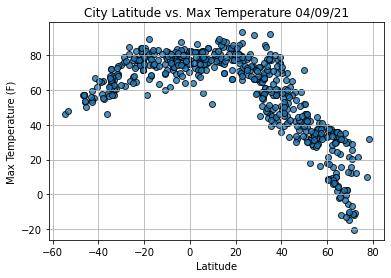

In [28]:
#Build the scatter plot for latitude vs. max temp

plt.scatter(lats, 
            max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig1.png")
#show plot
plt.show()

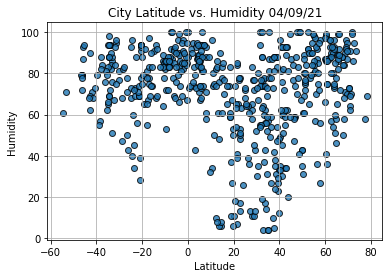

In [29]:
#Build the scatter plot for latitude vs. max temp

plt.scatter(lats, 
            humidity,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig2.png")
#show plot
plt.show()

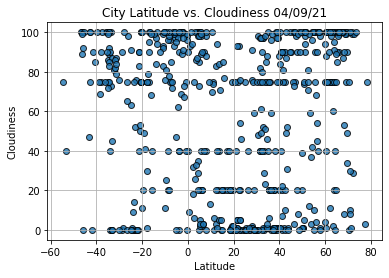

In [30]:
#Build the scatter plot for latitude vs. max temp

plt.scatter(lats, 
            cloudiness,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig3.png")
#show plot
plt.show()

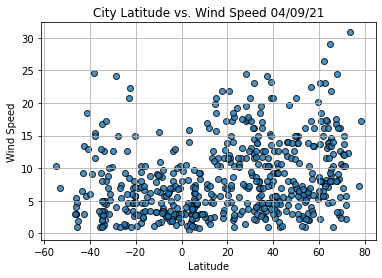

In [31]:
#Build the scatter plot for latitude vs. max temp

plt.scatter(lats, 
            wind_speed,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")
#incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
#save the figure
plt.savefig("weather_data/Fig4.png")
#show plot
plt.show()

In [51]:
#import the linear regression function from the SciPy statistics module
from scipy.stats import linregress

#create a function to perform linear regression on the weather data
#and plot the regression line and equation on the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [52]:
index13 = city_data_df.loc[13] 
index13

City                   Vila Velha
Country                        BR
Date          2021-04-09 22:53:33
Lat                      -20.3297
Lng                      -40.2925
Max Temp                       77
Humidity                       78
Cloudiness                     75
Wind Speed                  14.97
Name: 13, dtype: object

In [53]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
551     True
552    False
553     True
554     True
555     True
Name: Lat, Length: 556, dtype: bool

In [54]:
#use the loc method to get the countries from the Northern hemisphere(latitiude will be positive)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

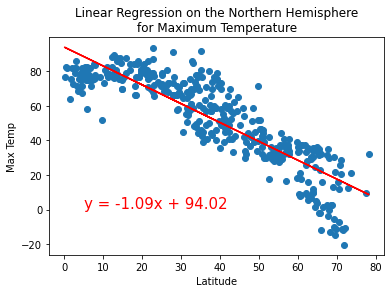

In [66]:
#call the linear regression method on the Northern hemisphere dataframe
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#call the function created above
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp', (5, 1))

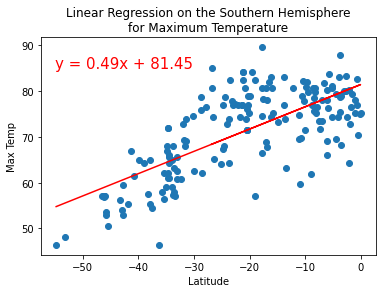

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-55,85))

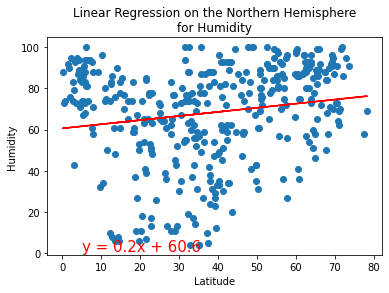

In [68]:
#call the linear regression method on the Northern hemisphere dataframe
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#call the function created above
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\nfor Humidity', 'Humidity', (5, 1))

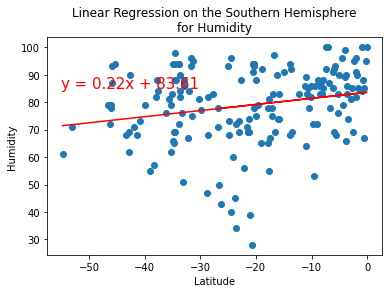

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Humidity', 'Humidity',(-55,85))

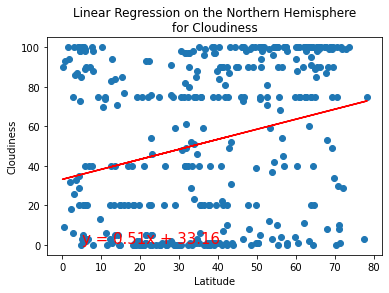

In [70]:
#call the linear regression method on the Northern hemisphere dataframe
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#call the function created above
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\nfor Cloudiness', 'Cloudiness', (5, 1))

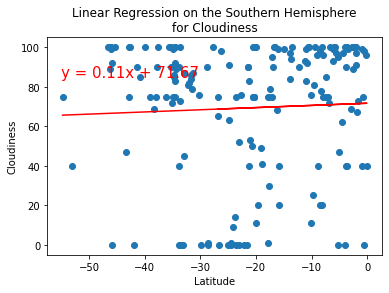

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Cloudiness', 'Cloudiness',(-55,85))

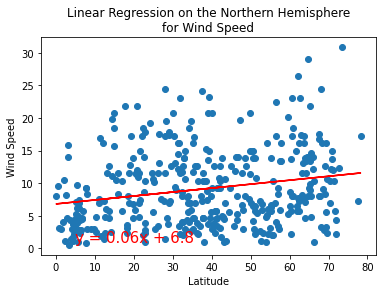

In [72]:
#call the linear regression method on the Northern hemisphere dataframe
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#call the function created above
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed', (5, 1))

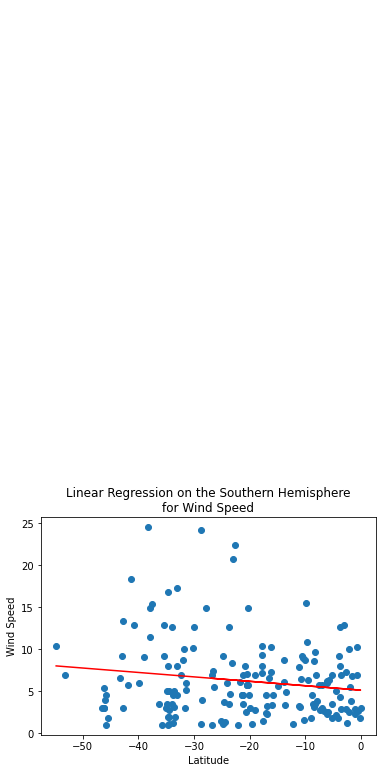

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-55,85))